# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | santa barbara
Processing Record 4 of Set 1 | cayenne
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | samarai
Processing Record 11 of Set 1 | yanchukan
City not found. Skipping...
Processing Record 12 of Set 1 | torit
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | dali
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | camacha
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | osterburg
Processing Record 20 of Set 1 | muroto
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | havre
Processing Record 42 of Set 4 | samana
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | griffith
Processing Record 45 of Set 4 | konya
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | neunkirchen
Processing Record 48 of Set 4 | henties bay
Processing Record 49 of Set 4 | monrovia
Processing Record 0 of Set 5 | hamilton
Processing Record 1 of Set 5 | lebu
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | gobabis
Processing Record 4 of Set 5 | pangai
Processing Record 5 of Set 5 | ordzhonikidze
Processing Record 6 of Set 5 | campobello di mazara
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | gambela
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | sarangani
Processing Record 11 of Set 5 | urbano santos
Processing Record 12 of Set 5 | 

Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | sao felix do xingu
Processing Record 34 of Set 8 | karamea
City not found. Skipping...
Processing Record 35 of Set 8 | satitoa
City not found. Skipping...
Processing Record 36 of Set 8 | aklavik
Processing Record 37 of Set 8 | nabire
Processing Record 38 of Set 8 | dickinson
Processing Record 39 of Set 8 | tabou
Processing Record 40 of Set 8 | ishinomaki
Processing Record 41 of Set 8 | uyemskiy
Processing Record 42 of Set 8 | saskylakh
Processing Record 43 of Set 8 | banda aceh
Processing Record 44 of Set 8 | xining
Processing Record 45 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 46 of Set 8 | lagunas
Processing Record 47 of Set 8 | bahir dar
Processing Record 48 of Set 8 | quime
Processing Record 49 of Set 8 | farafangana
Processing Record 0 of Set 9 | khandyga
Processing Record 1 of Set 9 | kapoeta
Processing Record 2 of Set 9 | port alfred
Processing Record 3 of Set 9 | kolno
Processing Re

Processing Record 18 of Set 12 | nadvoitsy
Processing Record 19 of Set 12 | lerwick
Processing Record 20 of Set 12 | ibia
Processing Record 21 of Set 12 | trelew
Processing Record 22 of Set 12 | neiafu
Processing Record 23 of Set 12 | jabinyanah
Processing Record 24 of Set 12 | seondha
Processing Record 25 of Set 12 | itarema
Processing Record 26 of Set 12 | bom jesus
Processing Record 27 of Set 12 | payo
Processing Record 28 of Set 12 | sumbe
Processing Record 29 of Set 12 | jacareacanga
Processing Record 30 of Set 12 | koulikoro
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | dicabisagan
Processing Record 33 of Set 12 | berck
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12 | terra rica
Processing Record 36 of Set 12 | auki
Processing Record 37 of Set 12 | yingcheng
Processing Record 38 of Set 12 | saleaula
City not found. Skipping...
Processing Record 39 of Set 12 | el alto
Processing Record 40 of Set 12 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,17.73,81,100,2.17,ZA,1672971628
1,albany,42.6001,-73.9662,6.69,90,97,0.89,US,1672971620
2,santa barbara,34.7333,-120.0343,9.90,91,100,2.06,US,1672971565
3,cayenne,4.9333,-52.3333,23.02,100,75,1.03,GF,1672971353
4,new norfolk,-42.7826,147.0587,20.40,36,0,2.16,AU,1672971633


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,17.73,81,100,2.17,ZA,1672971628
1,albany,42.6001,-73.9662,6.69,90,97,0.89,US,1672971620
2,santa barbara,34.7333,-120.0343,9.90,91,100,2.06,US,1672971565
3,cayenne,4.9333,-52.3333,23.02,100,75,1.03,GF,1672971353
4,new norfolk,-42.7826,147.0587,20.40,36,0,2.16,AU,1672971633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

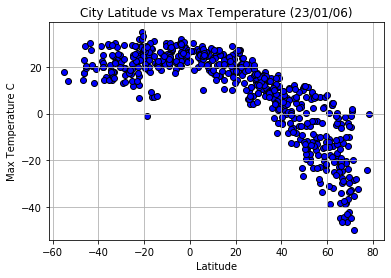

In [24]:
# Today date
today = time.strftime("%y/%m/%d")
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature C")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid()
plt.style.use('fast')
# Save the figure
plt.savefig("../output_data/Fig1.png" , dpi=80)

# Show plot
plt.show()

#### Latitude Vs. Humidity

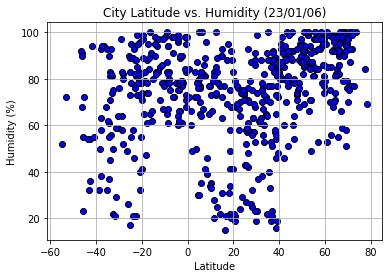

In [25]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

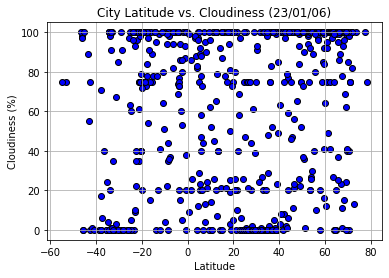

In [26]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

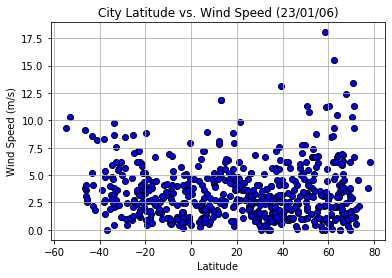

In [27]:
# Today date
today = time.strftime("%y/%m/%d")
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , marker="o" , facecolor="b" , edgecolor="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def regression():
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
    regress_values=x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line_eq,(0,12),fontsize=15,color="red")
    print(f'The r-value is : {rvalue}')
    
# Define a function to measure correlation
def correlation():
    corr=st.pearsonr(x_values, y_values)
    print(f'the correlation between both factor is : {round(corr[0],2)}')
    

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,6.69,90,97,0.89,US,1672971620
2,santa barbara,34.7333,-120.0343,9.90,91,100,2.06,US,1672971565
3,cayenne,4.9333,-52.3333,23.02,100,75,1.03,GF,1672971353
5,nantucket,41.2835,-70.0995,8.06,98,100,6.17,US,1672971337
6,naze,28.3667,129.4833,16.51,57,61,2.54,JP,1672971636


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,17.73,81,100,2.17,ZA,1672971628
4,new norfolk,-42.7826,147.0587,20.40,36,0,2.16,AU,1672971633
7,rikitea,-23.1203,-134.9692,25.86,76,9,7.19,PF,1672971637
8,punta arenas,-53.1500,-70.9167,14.06,72,75,10.29,CL,1672971639
9,samarai,-10.6167,150.6667,29.97,67,64,3.20,PG,1672971640


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8571693678704896


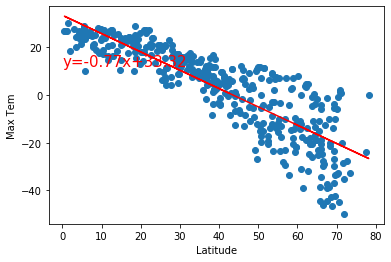

the correlation between both factor is : -0.86


In [86]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

correlation()

The Max Tempature vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is -0.86 , the data seems to show , the max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere.

The r-value is : 0.2976302962016073


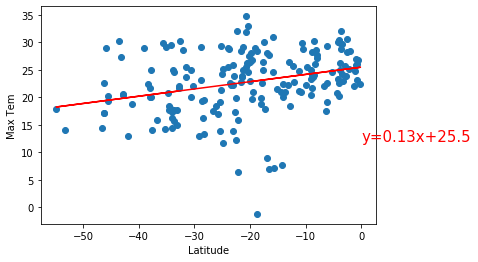

the correlation between both factor is : 0.3


In [76]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

correlation()

The Max Tempature vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.3 ,Unlike northern hemisphere,  the data seems to show no relationship between max tempature and latitude for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.44165432032571555


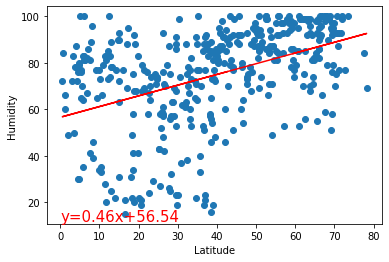

the correlation between both factor is : 0.44


In [77]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

correlation()

The Humidity vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is 0.44 , the data seems to show no relationship between Humidity and latitude for the northern hemisphere.

The r-value is : 0.34576114502688104


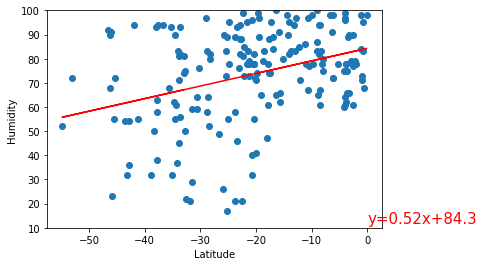

the correlation between both factor is : 0.35


In [93]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.ylim(10,100)
plt.show()

correlation()

The Humidity vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.35 , the data seems to show no relationship between Humidity and latitude for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.23562138494132276


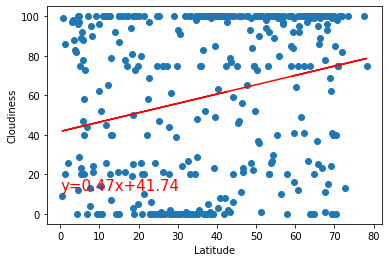

the correlation between both factor is : 0.24


In [79]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

correlation()

The Cloudiness vs. Latitude plot for cities in the northern hemisphere is shown above. The correlation value is 0.24 , the data seems to show no relationship between cloudiness and latitude for the northern hemisphere.

The r-value is : 0.2988572692109772


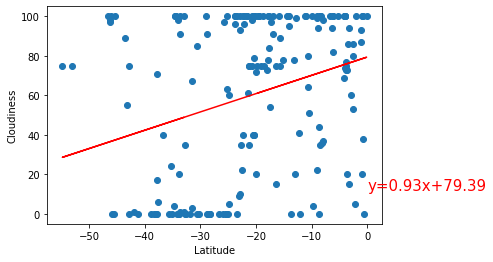

the correlation between both factor is : 0.3


In [80]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

correlation()

 The Cloudiness vs. Latitude plot for cities in the southern hemisphere is shown above. The correlation value is 0.3 , the data seems to show no relationship between cloudiness and latitude for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0764238774964734


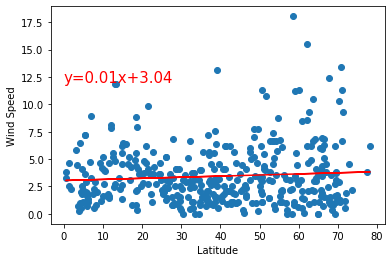

the correlation between both factor is : 0.08


In [81]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
correlation()

The Wind Speed vs. Latitude plot for cities in the northern hemisphere is shown above. the correlation value is 0.08 , the data seems to show no relationship between wind speed and latitude for the northern hemisphere. 

The r-value is : -0.3623724147794168


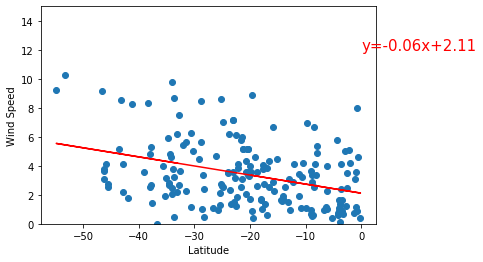

the correlation between both factor is : -0.36


In [96]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0,15)
plt.show()
correlation()

 The Wind Speed vs. Latitude plot for cities in the southern hemisphere is shown above. the correlation value is -0.36 , the data seems to show no relationship between wind speed and latitude for the southern hemisphere. 